In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ipywidgets as widgets
import os
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set()

## Diferencia entre estimadores puntuales y poblacionales

### Estimadores Poblacionales
- Representan parámetros verdaderos de toda la población.
- Se calculan a partir de la totalidad de los datos de la población (cuando esta es conocida y accesible).
- Ejemplos comunes: 
  - Media poblacional ($\mu$).
  - Varianza poblacional ($\sigma^2$).
  - Proporción poblacional ($P$).

### Estimadores Puntuales
- Son estimaciones de los parámetros poblacionales obtenidas a partir de una muestra.
- Se usan cuando no se tiene acceso a toda la población y se desea inferir sobre ella a partir de un subconjunto de datos.
- Ejemplos comunes:
  - Media muestral ($\bar{x}$), que estima $\mu$.
  - Varianza muestral ($s^2$), que estima $\sigma^2$.
  - Proporción muestral ($\hat{p}$), que estima $P$.

### Diferencias clave:
| Característica          | Estimador Poblacional           | Estimador Puntual             |
|-------------------------|----------------------------------|--------------------------------|
| Base de cálculo         | Datos de toda la población      | Datos de una muestra          |
| Precisión               | Exacto                         | Aproximado (con error muestral) |
| Disponibilidad práctica | Poco común                      | Muy común                     |

Los estimadores puntuales son fundamentales en estadística inferencial para realizar análisis y conclusiones sobre parámetros poblacionales a partir de datos limitados.


In [4]:
poblacion = pd.read_csv("/Users/andrespadronquintana/Desktop/DIPLOMADO MACHINE LEARNING DS/MÓDULO 2/titanic.csv")
poblacion.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Intervalos de Confianza

El **intervalo de confianza** es un rango de valores, calculado a partir de los datos muestrales, que se utiliza para estimar un parámetro poblacional con un cierto nivel de confianza. Este rango indica dónde probablemente se encuentra el parámetro desconocido, considerando la incertidumbre inherente al muestreo.

Por ejemplo, un intervalo de confianza para la media de una población es un rango que posiblemente contenga el valor verdadero de dicha media. Si predijéramos que el precio de una acción mañana estará entre $0$ y $1$ billón, podríamos estar 100% seguros de que esta predicción será correcta. Sin embargo, si ajustamos la predicción al rango de $133$ a $270$, la confianza disminuye. Esto ilustra cómo los intervalos más estrechos tienden a ser menos confiables.

Un intervalo de confianza del **95%** significa que, si se tomaran un número infinito de muestras de la población y se calculara un intervalo de confianza para cada muestra, aproximadamente el **95%** de esos intervalos contendrían el verdadero parámetro poblacional (por ejemplo, la media). A partir de una muestra, podemos calcular un intervalo alrededor de la media muestral que probablemente incluya la media poblacional verdadera.

---

## Factores que influyen en el intervalo de confianza

1. **Tamaño de la muestra:**
   - Un mayor tamaño muestral genera intervalos más estrechos, ya que se reduce la variabilidad de la estimación.
   
2. **Nivel de confianza:**
   - Indica el porcentaje de veces que el intervalo incluirá el parámetro poblacional si se repitieran los cálculos múltiples veces. Niveles comunes son el **95%** y el **99%**.

3. **Margen de error:**
   - Representado por $\alpha$ (nivel de significancia), indica la probabilidad de que el parámetro real esté fuera del intervalo.

4. **Parámetro estimado:**
   - Dependiendo de lo que se estime (media, proporción, diferencia de medias, etc.), se usará un estadístico pivote específico para construir el intervalo.

---

## Estandarizando una muestra

Comencemos con un intervalo de confianza para la **media poblacional** bajo el supuesto de varianza conocida. Según el **teorema del límite central**, si tomamos una muestra aleatoria suficientemente grande de una población, la distribución de la media muestral $\bar{x}$ seguirá una distribución normal estandarizada:

$$
Z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}
$$

donde:
- $\bar{x}$ es la media muestral.
- $\mu$ es la media poblacional.
- $\sigma$ es la desviación estándar poblacional.
- $n$ es el tamaño de la muestra.

Usando esta fórmula, podemos construir un intervalo de confianza para la media poblacional como:

$$
\bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

donde $Z_{\alpha/2}$ es el valor crítico de la distribución normal estándar que corresponde al nivel de confianza deseado (por ejemplo, $Z_{0.025} = 1.96$ para un 95% de confianza).

---

## Conclusión

Los intervalos de confianza son herramientas fundamentales en estadística inferencial que nos permiten realizar estimaciones sobre parámetros poblacionales con un nivel específico de certeza. Su precisión depende de factores como el tamaño de la muestra, el nivel de confianza elegido y la variabilidad de los datos. La correcta construcción e interpretación de estos intervalos es esencial para la toma de decisiones informadas basadas en datos.


# Construcción Paso a Paso de un Intervalo de Confianza para la Media (Varianza Conocida)

A continuación, se detalla cómo se construye un intervalo de confianza para la media poblacional $\mu$ cuando la varianza poblacional $\sigma^2$ es conocida:

---

## Paso 1: Identificar los datos necesarios
Para calcular el intervalo de confianza, necesitamos:
1. Media muestral ($\bar{x}$).
2. Tamaño de la muestra ($n$).
3. Desviación estándar poblacional ($\sigma$).
4. Nivel de confianza deseado ($1 - \alpha$), donde $\alpha$ es el nivel de significancia.

---

## Paso 2: Seleccionar el nivel de confianza
Determina el nivel de confianza deseado, por ejemplo:
- 95%: $\alpha = 0.05$, entonces $\alpha/2 = 0.025$.
- 99%: $\alpha = 0.01$, entonces $\alpha/2 = 0.005$.

---

## Paso 3: Obtener el valor crítico $Z_{\alpha/2}$
El valor crítico $Z_{\alpha/2}$ corresponde al punto en la distribución normal estándar donde se encuentra el área acumulada igual a $1 - \alpha/2$.

- Para un nivel de confianza del 95%, $Z_{0.025} = 1.96$.
- Para un nivel de confianza del 99%, $Z_{0.005} = 2.576$.

---

## Paso 4: Calcular el error estándar
El error estándar de la media se calcula como:

$$
\text{Error estándar} = \frac{\sigma}{\sqrt{n}}
$$

donde:
- $\sigma$ es la desviación estándar poblacional.
- $n$ es el tamaño de la muestra.

---

## Paso 5: Construir el intervalo de confianza
El intervalo de confianza se calcula como:

$$
\bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

donde:
- $\bar{x}$ es la media muestral.
- $Z_{\alpha/2}$ es el valor crítico.
- $\frac{\sigma}{\sqrt{n}}$ es el error estándar.

El resultado es un intervalo que abarca desde:

$$
\text{Límite inferior} = \bar{x} - Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

hasta:

$$
\text{Límite superior} = \bar{x} + Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}.
$$

---

## Paso 6: Interpretación
El intervalo final indica el rango de valores dentro del cual es probable que se encuentre la media poblacional $\mu$, con el nivel de confianza especificado. Por ejemplo, para un intervalo de confianza del 95%, tenemos un 95% de certeza de que el intervalo contiene el verdadero valor de $\mu$.


In [5]:
Poblacion = np.random.normal(10,100,1_000_000)

In [6]:
Poblacion.mean()

10.202204251709329

In [7]:
Poblacion.std()

100.0302568400587

In [8]:
muestra = np.random.choice(Poblacion,1000,replace=False)

In [9]:
len(muestra)

1000

In [10]:
muestra

array([  67.97470218,  157.82645754,  -58.18321626,  -77.11489205,
        142.09420032,   26.50002751,    5.62212011, -259.55238225,
        -34.10618523, -202.36721572,  -17.35111069,  -47.13827026,
         23.10048968,  -39.87765958,   29.91002491,  -28.43597517,
        -16.12086869, -200.46775809,  -76.82552344, -102.05528525,
         44.72336041,   85.82128789,  -30.68307784,  -94.19427739,
         91.51509657,  -10.99591531,  173.48751737,   92.49029222,
         -9.32053771,  152.46007021,   49.47979739,  179.59508866,
        -49.94771692, -130.42772925,  -42.5868988 ,   40.66603056,
        -30.70943064, -122.5102926 ,   31.03436777,  -37.7958672 ,
         10.88763414,   48.78946672,  142.81168283,   13.37207699,
        -92.71982936,   34.18153223,  109.01181707,  150.0919029 ,
        -58.42643103, -242.16090984,   55.01874286,  117.06681492,
        -51.96083416,  159.0204869 ,  -81.7098106 ,  -16.16854929,
        -87.15200704,  -44.09070581,   88.4384405 , -140.41729

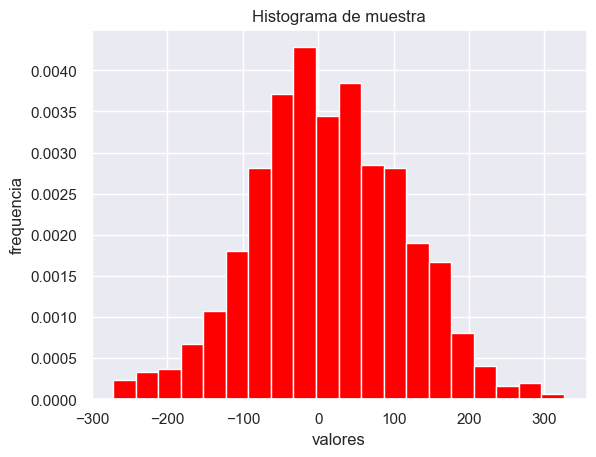

In [11]:
# histograma de distribución 
plt.hist(muestra,bins=20,density=True,cumulative=False,color="red")
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de muestra')
plt.show()

In [12]:
muestra.mean()

12.283210948960267

In [13]:
Poblacion.mean()

10.202204251709329

In [14]:
muestra.std()

100.47594871808762

In [15]:
# Para las medias
means=[]

for i in range(1_000):
    aux = np.random.choice(Poblacion,1000,replace=False)
    means.append(aux.mean())

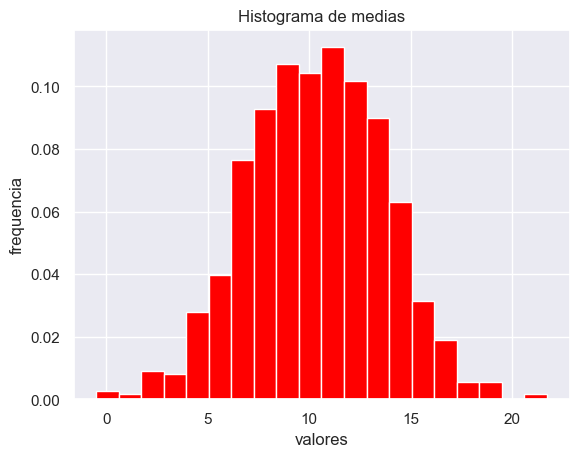

In [16]:
# histograma de distribución 
plt.hist(means,bins=20,density=True,cumulative=False,color="red")
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma de medias')
plt.show()

Demostrar el Teorema del Límite Central (TLC): Aunque la población tiene una gran variabilidad (desviación estándar de 100), las medias muestrales tenderán a seguir una distribución normal 

In [17]:
np.mean(means)

10.340470115011318

In [18]:
np.std(means)

3.3295081241962174

# Varianza de las Medias Muestrales y el Teorema del Límite Central

Cuando calculamos medias muestrales a partir de una población, la **desviación estándar de las medias muestrales** (también llamada error estándar de la media) es menor que la desviación estándar de la población. Esto se debe al **teorema del límite central**, que establece que:

1. La **media de las medias muestrales** es igual a la media de la población ($\mu = 10$ en este caso).
2. La **desviación estándar de las medias muestrales** se calcula como:
   $$
   \text{Error estándar} = \frac{\sigma}{\sqrt{n}}
   $$
   donde $\sigma$ es la desviación estándar de la población y $n$ el tamaño de la muestra.

En tu ejemplo:
- $\sigma = 100$, $n = 1000$.
- Error estándar = $\frac{100}{\sqrt{1000}} \approx 3.16$.

Esto explica por qué la **media de las medias sigue siendo 10**, pero su desviación estándar baja a **3.16** en lugar de 100: las medias muestrales están menos dispersas, ya que promedian más datos, reduciendo la variabilidad aleatoria.


In [19]:
# entonces la varianza de las medias

Poblacion.std()/np.sqrt(len(muestra))


3.1632344654622284

# Relación entre los valores de Z y los porcentajes en una distribución normal

Para construir un intervalo de confianza, necesitamos relacionar los valores de **Z** con el porcentaje de datos de la población que se encuentra incluido entre esos valores. Esto se representa como $(1 - \alpha)\%$, donde $\alpha$ es el nivel de significancia.

---

## Definición de nivel de confianza y nivel de significancia

Si definimos un nivel de confianza del **90%**, esto implica que el intervalo incluirá el parámetro poblacional en el 90% de los casos. El nivel de significancia $\alpha$ será:

$$
\alpha = 1 - \text{nivel de confianza} = 1 - 0.90 = 0.10 \quad \text{(10%)}.
$$

El **complemento del nivel de confianza** representa la probabilidad de que el intervalo **no contenga** el verdadero parámetro poblacional.

---

## Distribución del error en las colas

En una distribución normal, la probabilidad $\alpha$ se distribuye de manera **simétrica** entre las dos colas (izquierda y derecha). Por lo tanto, en lugar de asignar todo el 10% a una cola, se divide entre dos:

$$
\frac{\alpha}{2} = \frac{0.10}{2} = 0.05 \quad \text{(5% en cada cola)}.
$$

Esto significa que buscaremos los valores críticos $Z_{\alpha/2}$ y $-Z_{\alpha/2}$, que corresponden a los puntos donde el área acumulada de cada cola es del 5%.

---

## Relación con la distribución normal estándar

Recordemos que la **distribución normal estándar** es simétrica alrededor de la media ($\mu = 0$), lo que implica que:

- El valor crítico en la cola izquierda es $-Z_{\alpha/2}$.
- El valor crítico en la cola derecha es $Z_{\alpha/2}$.

Estos valores se utilizan para construir el intervalo de confianza. Para un nivel de confianza del **90%**, el valor de $Z_{\alpha/2}$ se obtiene de tablas de la distribución normal o software estadístico, y es aproximadamente **$Z_{0.05} = 1.645$**.

---

## Resumen visual

1. Nivel de confianza: **90%**.
2. Nivel de significancia: **$\alpha = 10\%$**.
3. Distribución del error: **5% en cada cola**.
4. Valores críticos: $-Z_{0.05}$ y $Z_{0.05}$, con $Z_{0.05} = 1.645$.

Usamos estos valores para construir un intervalo de confianza alrededor de la media muestral.


In [20]:
import scipy.stats as stats

# Calcular el percentil del 5% de una distribución normal estándar 

percentil_5 = stats.norm.ppf(0.05)

print("El centil del 5% de una distribución normal estándar es:", percentil_5)

El centil del 5% de una distribución normal estándar es: -1.6448536269514729


Por lo que nuestras Z´s en el ejemplo serían - 1.64 y 1.64

In [21]:
from scipy import stats

# Cálculo de percentiles en una distribución normal estándar
print(f"El percentil del 5% de una distribución normal estándar es: {stats.norm.ppf(0.05):.4f}")
print(f"El percentil del 2.5% de una distribución normal estándar (para un intervalo de confianza del 95%) es: {stats.norm.ppf(0.025):.4f}")
print(f"El percentil del 0.5% de una distribución normal estándar (para un intervalo de confianza del 99%) es: {stats.norm.ppf(0.005):.4f}")


El percentil del 5% de una distribución normal estándar es: -1.6449
El percentil del 2.5% de una distribución normal estándar (para un intervalo de confianza del 95%) es: -1.9600
El percentil del 0.5% de una distribución normal estándar (para un intervalo de confianza del 99%) es: -2.5758


# Construcción del Intervalo de Confianza

Sustituyendo los valores críticos de la **distribución normal estándar** en la fórmula del intervalo de confianza, tenemos:

$$
\bar{x} \pm Z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}
$$

Donde:
- $\bar{x}$: Media muestral.
- $Z_{\alpha/2}$: Valor crítico de la distribución normal estándar para el nivel de confianza deseado.
- $\sigma$: Desviación estándar de la población.
- $n$: Tamaño de la muestra.

Este método se puede utilizar cuando:
1. La muestra es suficientemente grande (típicamente $n \geq 30$).
2. La distribución de la población es normal.
3. Se conoce la desviación estándar poblacional $\sigma$.

---

## Para muestras pequeñas ($n < 30$)

En el caso de muestras pequeñas, es decir, cuando $n < 30$, no podemos asumir que las medias muestrales siguen una distribución normal estándar. En su lugar, utilizamos la **distribución t de Student**, la cual es más adecuada debido a la mayor variabilidad que presentan las medias muestrales con tamaños pequeños.

El intervalo de confianza se construye como:

$$
\bar{x} \pm t_{\alpha/2, \, df} \cdot \frac{s}{\sqrt{n}}
$$

Donde:
- $\bar{x}$: Media muestral.
- $t_{\alpha/2, \, df}$: Valor crítico de la distribución t con $df = n - 1$ grados de libertad.
- $s$: Desviación estándar muestral (se usa porque $\sigma$ normalmente no es conocida para muestras pequeñas).
- $n$: Tamaño de la muestra.

---

### Notas importantes:
- La **distribución t** es similar a la normal, pero tiene colas más gruesas, lo que refleja mayor incertidumbre para muestras pequeñas.
- A medida que el tamaño de la muestra crece ($n \to \infty$), la distribución t se aproxima a la distribución normal estándar.

Este procedimiento es especialmente útil cuando la población tiene una distribución normal y no se conoce el valor de la desviación estándar poblacional.


In [22]:
# Datos
media_muestral = 50  # Media de la muestra
sigma = 10  # Desviación estándar poblacional
n = 100  # Tamaño de la muestra
nivel_confianza = 0.95  # Nivel de confianza

# Valor crítico Z para el nivel de confianza
z_alpha_2 = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Error estándar
error_estandar = sigma / np.sqrt(n)

# Intervalo de confianza
limite_inferior = media_muestral - z_alpha_2 * error_estandar
limite_superior = media_muestral + z_alpha_2 * error_estandar

print(f"Intervalo de confianza del 95% (muestra grande): ({limite_inferior:.2f}, {limite_superior:.2f})")

Intervalo de confianza del 95% (muestra grande): (48.04, 51.96)


In [23]:
1 - (1 - nivel_confianza) / 2

0.975

In [24]:
# Datos
media_muestral = 50  # Media de la muestra
s = 10  # Desviación estándar muestral
n = 15  # Tamaño de la muestra
nivel_confianza = 0.95  # Nivel de confianza

# Grados de libertad
gl = n - 1

# Valor crítico t para el nivel de confianza
t_alpha_2 = stats.t.ppf(1 - (1 - nivel_confianza) / 2, gl)

# Error estándar
error_estandar = s / np.sqrt(n)

# Intervalo de confianza
limite_inferior = media_muestral - t_alpha_2 * error_estandar
limite_superior = media_muestral + t_alpha_2 * error_estandar

print(f"Intervalo de confianza del 95% (muestra pequeña): ({limite_inferior:.2f}, {limite_superior:.2f})")


Intervalo de confianza del 95% (muestra pequeña): (44.46, 55.54)


# Pruebas de Hipótesis

## **Conceptos Preliminares**

Supongamos que una empresa produce bombillos y se espera que su vida útil sea de **1000 horas**. Debido a quejas, la gerencia desea verificar si la vida media de los bombillos realmente es **1000 horas** o si es menor. Como no podemos analizar toda la población, debemos tomar una muestra para realizar la prueba y verificar su vida media.

### Importancia del Muestreo
La muestra siempre está sujeta a variabilidad, lo que implica que:
- La vida media podría ser **sobreestimada** o **subestimada** debido al azar.
- Esto genera un riesgo inherente al proceso de muestreo.

---

## **¿Qué es una Hipótesis?**
Una **hipótesis** es una afirmación o conjetura sobre un parámetro poblacional que está sujeta a verificación.

### **Prueba de Hipótesis**
Es un procedimiento basado en:
1. **Evidencia de la muestra.**
2. **Teoría de probabilidades.**

Este procedimiento permite determinar si la hipótesis planteada es razonable.

---

## **Ejemplo**
Se desea probar:
- **Hipótesis Nula ($H_0$):** La vida media de los bombillos es **1000 horas**.
- **Hipótesis Alternativa ($H_1$):** La vida media de los bombillos es **menor que 1000 horas**.

Expresado matemáticamente:
$$
H_0: \mu = 1000 \\
H_1: \mu < 1000
$$

Supongamos que se toma una muestra de **30 bombillos** y se obtiene una media muestral de **985 horas**. ¿Es esto suficiente evidencia para concluir que la vida media es menor que 1000 horas?

---

## **Decisión: ¿Cuándo Rechazar $H_0$?**
La **hipótesis nula** se rechaza **solo** si los datos muestrales ofrecen suficiente evidencia para no considerarla verdadera. 

Dado que las muestras se obtienen al azar, las diferencias entre la media muestral y la media poblacional podrían deberse simplemente al azar y no a un problema real.

---

## **Nivel de Significancia ($\alpha$)**
Es la **probabilidad de rechazar la hipótesis nula cuando esta es verdadera**. Normalmente se fija en valores como:
- $\alpha = 0.05$ (5%).
- $\alpha = 0.01$ (1%).

Este nivel representa el criterio para decidir si los datos muestrales proporcionan suficiente evidencia para rechazar $H_0$.

---

## **Tipos de Errores**
1. **Error Tipo I ($\alpha$):**
   - Rechazar $H_0$ cuando es verdadera.
   - Ejemplo: Concluir erróneamente que la vida media es menor a 1000 horas, implicando costos innecesarios al mejorar procesos que no requieren ajuste.

2. **Error Tipo II ($\beta$):**
   - No rechazar $H_0$ cuando es falsa.
   - Ejemplo: Concluir que la vida media es 1000 horas cuando en realidad es menor, causando insatisfacción de los clientes.

---

## **Estadístico de Prueba**
Es un valor calculado a partir de la muestra que se contrasta con un **valor crítico**. Este proceso permite decidir si se acepta o rechaza la hipótesis nula.

---

## **Tipos de Pruebas**
1. **Prueba de Una Cola (Inferior):**
   - $H_1: \mu < 1000$

2. **Prueba de Una Cola (Superior):**
   - $H_1: \mu > 1000$

3. **Prueba de Dos Colas:**
   - $H_1: \mu \neq 1000$

Cada tipo de prueba depende de la hipótesis planteada y la dirección en la que se espera observar una diferencia significativa.

---

## **Resumen del Proceso**
1. **Plantear $H_0$ y $H_1$.**
2. **Definir $\alpha$.**
3. **Calcular el estadístico de prueba.**
4. **Comparar el estadístico con el valor crítico.**
5. **Tomar una decisión:** Rechazar o no rechazar $H_0$.



###  Ejemplo de medias

# Ejemplo: Prueba de Hipótesis para la Media Poblacional

### **Planteamiento del problema**
Se tiene una muestra de datos generados aleatoriamente con:
- Media poblacional esperada: $\mu = 800$
- Desviación estándar: $\sigma = 100$
- Tamaño de la muestra: $n = 40$

La muestra observada sugiere que la media podría ser menor a 800. Vamos a realizar una prueba de hipótesis a un nivel de significancia del 5% ($\alpha = 0.05$) para determinar si la media poblacional es efectivamente 800.

---

### **Paso 1: Plantear las hipótesis**
- **Hipótesis nula ($H_0$):** $\mu = 800$ (la media poblacional es 800).
- **Hipótesis alternativa ($H_1$):** $\mu < 800$ (la media poblacional es menor que 800).

Esta es una prueba de una cola (cola izquierda) porque estamos probando si la media es menor que 800.

---

### **Paso 2: Nivel de significancia**
Se fija un nivel de significancia de $\alpha = 0.05$, lo que indica un 5% de probabilidad de cometer un **error tipo I** (rechazar $H_0$ cuando es verdadera).

---

### **Paso 3: Estadístico de prueba**
Para comparar la media muestral con la media poblacional, utilizamos el estadístico $Z$:
$$
Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$
donde:
- $\bar{x}$: media muestral.
- $\mu$: media poblacional esperada bajo $H_0$.
- $\sigma$: desviación estándar poblacional.
- $n$: tamaño de la muestra.

---

### **Paso 4: Criterio de rechazo**
Obtenemos el valor crítico de $Z$ (también llamado $Z$ tabular) correspondiente a $\alpha = 0.05$ para una prueba de una cola (cola izquierda):
$$
Z_{\text{tabular}} = \text{stats.norm.ppf(0.05)} \approx -1.645
$$

Si el **$Z$ calculado** es menor que $Z_{\text{tabular}}$, rechazamos $H_0$.




In [25]:
# Se tiene la siguiente muestra de medias y decimos que la media es 800

np.random.seed(1)

muestra = np.random.normal(800,100,40)

In [26]:
? np.random.normal

In [ ]:
muestra

In [ ]:
media = np.mean(muestra)
media

In [ ]:
# Determine a un nivel de significancia del 5% si la media poblacional es efectivamente 800

In [ ]:
stats.norm.ppf(.05 )  # Z tabular

In [ ]:
(media-800)/(100/(np.sqrt(40)))  # Z calculada

In [ ]:
 np.abs((media-800)/(100/(np.sqrt(40))) ) <  np.abs(stats.norm.ppf(.05 ) ) 

Paso 5: aceptar o rechazar la hipotesis nula

En nuestro caso la Z calculada en absoluto es menor, por lo que caemos en zona de aceptacion 

# El p-valor en Pruebas de Hipótesis

El **p-valor** es una medida de la probabilidad de que los datos observados (o más extremos) ocurran bajo la suposición de que la hipótesis nula ($H_0$) es verdadera. Sirve como una métrica clave en pruebas de hipótesis para determinar si los resultados son estadísticamente significativos.

---

## **Definición**
El **p-valor** se interpreta como:
- La probabilidad de obtener un estadístico de prueba igual o más extremo que el observado, asumiendo que $H_0$ es cierta.
- Es un indicador de la **fuerza de la evidencia en contra de $H_0$**:
  - Si el p-valor es **pequeño** ($p < \alpha$), hay suficiente evidencia para rechazar $H_0$.
  - Si el p-valor es **grande** ($p \geq \alpha$), no se rechaza $H_0$.

---

## **Pasos para Calcular el p-valor**

### **1. Plantear las Hipótesis**
- **$H_0$:** Hipótesis nula (afirmación inicial que se desea probar o refutar).
- **$H_1$:** Hipótesis alternativa (lo que sospechamos).

Ejemplo:
- $H_0: \mu \leq \mu_0$ (la media poblacional es menor o igual a un valor dado).
- $H_1: \mu > \mu_0$ (la media poblacional es mayor que ese valor).

---

### **2. Identificar el Estadístico de Prueba**
Para la media poblacional, el estadístico de prueba es:

$$
Z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}
$$

donde:
- $\bar{x}$: Media muestral.
- $\mu_0$: Media poblacional bajo $H_0$.
- $\sigma$: Desviación estándar poblacional (si es desconocida, se usa la cuasidesviación típica muestral $s$).
- $n$: Tamaño de la muestra.

---

### **3. Calcular el Valor del Estadístico de Prueba**
Sustituimos los valores observados (media muestral, tamaño de la muestra, etc.) en la fórmula del estadístico $Z$.

---

### **4. Calcular el p-valor**
El p-valor es el área en la cola de la distribución correspondiente al tipo de prueba:

1. **Prueba unilateral derecha ($H_1: \mu > \mu_0$):**
   - El p-valor es el área a la derecha del valor del estadístico calculado:
     $$
     p\text{-valor} = P(Z \geq Z_{\text{calculado}})
     $$

2. **Prueba unilateral izquierda ($H_1: \mu < \mu_0$):**
   - El p-valor es el área a la izquierda del valor del estadístico calculado:
     $$
     p\text{-valor} = P(Z \leq Z_{\text{calculado}})
     $$

3. **Prueba bilateral ($H_1: \mu \neq \mu_0$):**
   - El p-valor es el doble del área en una cola:
     $$
     p\text{-valor} = 2 \cdot P(Z \geq |Z_{\text{calculado}}|)
     $$

---

### **5. Comparar con el Nivel de Significancia ($\alpha$)**
- Si $p\text{-valor} < \alpha$, **rechazamos $H_0$**: Hay suficiente evidencia en contra de la hipótesis nula.
- Si $p\text{-valor} \geq \alpha$, **no rechazamos $H_0$**: No hay suficiente evidencia para rechazar la hipótesis nula.

---

## **Regiones de Aceptación y Rechazo**
1. **Región de aceptación:** Zona donde no rechazamos $H_0$. Representada por las áreas fuera de las colas críticas.
2. **Región de rechazo:** Zona donde rechazamos $H_0$. Representada por las áreas en las colas críticas.

Por ejemplo:
- En una prueba unilateral derecha con $\alpha = 0.05$, la región de rechazo sería el área a la derecha de $Z_{\alpha} \approx 1.645$.

---

## **Relación con el p-valor**
- Si el **p-valor es menor que $\alpha$**, el estadístico cae en la **región de rechazo**.
- Si el **p-valor es mayor o igual que $\alpha$**, el estadístico cae en la **región de aceptación**.

---

## **Interpretación**
- El p-valor mide qué tan consistentes son los datos con $H_0$:
  - **p-valor pequeño:** Los datos son inconsistentes con $H_0$ (evidencia en su contra).
  - **p-valor grande:** Los datos son consistentes con $H_0$ (no hay evidencia en su contra).

### Ejemplo:
1. Estadístico de prueba calculado: $Z_{\text{calculado}} = 1.5$.
2. Nivel de significancia: $\alpha = 0.05$.
3. Valor crítico: $Z_{\text{tabular}} \approx 1.645$.
4. p-valor: $P(Z \geq 1.5) \approx 0.0668$.

- Como $p\text{-valor} = 0.0668 > 0.05$, no rechazamos $H_0$.

---

## **Conclusión**
El **p-valor** proporciona una forma probabilística de evaluar la hipótesis nula. Si es pequeño, hay evidencia fuerte para rechazar $H_0$; si es grande, no hay suficiente evidencia para rechazarla.

Fórmula clave:
$$
p\text{-valor} = \text{Área en la cola según la dirección del contraste.}
$$


# Ejemplo
### Contraste de hipótesis



Los test Shapiro-Wilk test y D'Agostino's K-squared test son dos de los test de hipótesis más empleados para analizar la normalidad. En ambos, se considera como hipótesis nula que los datos proceden de una distribución normal.

El p-value de estos test indica la probabilidad de obtener unos datos como los observados si realmente procediesen de una población con una distribución normal con la misma media y desviación que estos. Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la normalidad.

El test de Shapiro-Wilk se desaconseja cuando se dispone de muchos datos (más de 50) por su elevada sensibilidad a pequeñas desviaciones de la normal.


$H_o:X \sim N(\mu, \sigma^2)$  
$H_a:X \nsim N(\mu, \sigma^2)$

In [ ]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(np.random.normal(0,1,400))   # .05
shapiro_test

In [ ]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(np.random.exponential(10,400))
shapiro_test

In [ ]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(np.random.normal(0,1,400))
print(f"Estadístico = {k2}, p-value = {p_value}")

In [ ]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(np.random.exponential(10,400))
print(f"Estadístico = {k2}, p-value = {p_value}")

### Prueba Xi cuadrada

La hipótesis estadística chi-cuadrado de Pearson es una prueba de independencia entre variables categóricas. 
El objetivo de la prueba es concluir si las dos variables(sexo y supervivencia) están relacionadas entre sí.

In [ ]:
poblacion = pd.read_csv("C:/Users/danie/OneDrive/Documentos/Clases ITAM/Data Science Machine Learning Financial Markets/G10 Presencial/Clases/bases/titanic.csv")
poblacion.head()

In [ ]:
poblacion[["Sex"]].value_counts()/poblacion[["Sex"]].value_counts().sum()

In [ ]:
pd.crosstab(poblacion["Sex"],poblacion["Survived"])

$H_o:$ No existe relacion entre las variables   
$H_a:$ Existe relacion entre las variables   

In [ ]:
data=[list(pd.crosstab(poblacion["Sex"],poblacion["Survived"]).iloc[0,:]),list(pd.crosstab(poblacion["Sex"],poblacion["Survived"]).iloc[1,:])]
data

In [ ]:
from scipy.stats import chi2_contingency 
  
data=[list(pd.crosstab(poblacion["Sex"],poblacion["Survived"]).iloc[0,:]),list(pd.crosstab(poblacion["Sex"],poblacion["Survived"]).iloc[1,:])]

stat, p, dof, expected = chi2_contingency(data) 
  
alpha = 0.05

print("p value is " + str(p)) 



In [ ]:
if p <= alpha: 
    print('Dependent(reject H0)') 
else: 
    print('Independent(H0 holds true)') 

### Pruebas de bondad de ajuste

Uno de las técnicas más conocidas para estudiar los contrastes no paramétricos son los tests de bondad de ajuste o tests   ji cuadrado

El contraste que intentamos estudiar es del tipo siguiente

$H_o:$  La distribución de X es del tipo Xo  
$H_a:$ La distribución de X no es del tipo Xo

In [ ]:
poblacion["Age"].std()

In [ ]:
poblacion["Age"].mean()

In [ ]:
poblacion["Age"].min()

#### prueba grafica

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(np.random.normal(29.6,14.5,1000), ax=ax, color='red', fill=False,label="Dist Normal")
sns.kdeplot(poblacion["Age"], ax=ax, color='blue', fill=False,label="Dist age")
plt.legend()
# visualizing plot using matplotlib.pyplot library
plt.show()

### prueba teorica qqplot

In [ ]:
import statsmodels.api as sm
from scipy import stats
fig, ax = plt.subplots(figsize=(7,4))

sm.qqplot(
    poblacion["Age"].dropna(),
    dist=stats.norm,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q Edades', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)


### test de kolmogorov

$H_o:$  La distribución de X es Normal  
$H_a:$ La distribución de X es No Normal

In [ ]:
from scipy.stats import kstest

In [ ]:


#set seed (por ejemplo, hacer que este ejemplo sea reproducible)
np.random.seed(0)


# realizar la prueba kstest de Kolmogorov-Smirnov 
kstest(poblacion["Age"].dropna(),"norm")

In [ ]:
?kstest

In [ ]:
poblacion

### Prueba de Kolmogorov-Smirnov de dos muestras

Verificar si dos muestras son de la misma distribucion

$H_o:$  La distribución de X la misma que Y
$H_a:$ La distribución de X no es la misma que Y

In [ ]:
data1=poblacion[poblacion.Pclass==1]["Age"].dropna()
data2=poblacion[poblacion.Pclass==3]["Age"].dropna()


In [ ]:
data1

In [ ]:
data2

In [ ]:
from scipy.stats import ks_2samp

# realizar la prueba de Kolmogorov-Smirnov
ks_2samp(data1, data2)

In [ ]:
data_2d=[data1,data2]

plt.boxplot(data_2d)
plt.title("Boxplot ")
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data1, ax=ax, color='purple', fill=False,label="Edades en primera clase")
sns.kdeplot(data2, ax=ax, color='green', fill=False,label="Edades en segunda clase")
plt.legend()
# visualizing plot using matplotlib.pyplot library
plt.show()

Tenemos suficiente informacion para rechazar la hipotesis nula de que provienen de la misma distribucion

In [ ]:
data_a=poblacion [poblacion .Embarked=="S"]["Age"].dropna()
data_b=poblacion [poblacion  .Embarked=="C"]["Age"].dropna()


In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(data_a, ax=ax, color='purple', fill=False,label="Edades en S")
sns.kdeplot(data_b, ax=ax, color='green', fill=False,label="Edades en C")
plt.legend()
# visualizing plot using matplotlib.pyplot library
plt.show()

In [ ]:
# realizar la prueba de Kolmogorov-Smirnov
ks_2samp(data_a, data_b)